In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial import distance as sci_distance
from sklearn.cluster import KMeans

In [50]:
customer_data = pd.read_csv(r'C:\Users\sidharth\Downloads\data.csv')

In [51]:
customer_data['BirthDate']=pd.to_datetime(customer_data['BirthDate'])

In [52]:
print("Data frame:", customer_data.head(n=5))

Data frame:    BirthDate MaritalStatus  YearlyIncome Gender  TotalChildren  \
0 1968-08-08             S  75001-100000      F              5   
1 1965-12-06             S   50001-75000      F              0   
2 1964-05-09             M   50001-75000      M              3   
3 1964-07-07             S   50001-75000      F              4   
4 1964-04-01             S   50001-75000      M              0   

   NumberChildrenAtHome   Education    Occupation  HomeOwner CommuteDistance  \
0                     5  Bachelors   Professional       True       1-2 Miles   
1                     0  Bachelors   Professional       True      5-10 Miles   
2                     3  Bachelors   Professional       True       0-1 Miles   
3                     4  Bachelors   Professional       True       10+ Miles   
4                     0  Bachelors   Professional      False      5-10 Miles   

   NumberOfPurchases  ProfitGenerated  Assignments  \
0                  5       10351.6657            2   
1 

In [53]:
customer_data.drop(['DistancesToClusterCenter no.0','DistancesToClusterCenter no.1','DistancesToClusterCenter no.2','DistancesToClusterCenter no.3'],'columns', inplace=True)

customer_data.head()

,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases,ProfitGenerated,Assignments
0,1968-08-08,S,75001-100000,F,5,5,Bachelors,Professional,True,1-2 Miles,5,10351.6657,2
1,1965-12-06,S,50001-75000,F,0,0,Bachelors,Professional,True,5-10 Miles,1,25636.9867,3
2,1964-05-09,M,50001-75000,M,3,3,Bachelors,Professional,True,0-1 Miles,2,9221.5725,3
3,1964-07-07,S,50001-75000,F,4,4,Bachelors,Professional,True,10+ Miles,3,16556.0652,3
4,1964-04-01,S,50001-75000,M,0,0,Bachelors,Professional,False,5-10 Miles,1,27955.7062,3


In [54]:
customer_data['BirthDate'] = customer_data['BirthDate'].dt.year

In [55]:
customer_data.head(10)

,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases,ProfitGenerated,Assignments
0,1968,S,75001-100000,F,5,5,Bachelors,Professional,True,1-2 Miles,5,10351.6657,2
1,1965,S,50001-75000,F,0,0,Bachelors,Professional,True,5-10 Miles,1,25636.9867,3
2,1964,M,50001-75000,M,3,3,Bachelors,Professional,True,0-1 Miles,2,9221.5725,3
3,1964,S,50001-75000,F,4,4,Bachelors,Professional,True,10+ Miles,3,16556.0652,3
4,1964,S,50001-75000,M,0,0,Bachelors,Professional,False,5-10 Miles,1,27955.7062,3
5,1963,M,50001-75000,M,4,4,Bachelors,Professional,True,10+ Miles,4,17241.6784,3
6,1968,M,75001-100000,F,2,0,Bachelors,Management,True,1-2 Miles,2,13535.9868,0
7,1968,M,75001-100000,M,2,0,Bachelors,Management,True,0-1 Miles,3,15911.8030,0
8,1968,S,75001-100000,F,3,0,Bachelors,Management,False,1-2 Miles,3,13191.6140,0
9,1979,S,25001-50000,F,0,0,Partial College,Skilled Manual,False,5-10 Miles,1,10626.0923,1


In [56]:
replace_map = {'MaritalStatus':{'S':False,'M':True}}
customer_data.replace(replace_map,inplace=True)
customer_data.head(10)

,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases,ProfitGenerated,Assignments
0,1968,False,75001-100000,F,5,5,Bachelors,Professional,True,1-2 Miles,5,10351.6657,2
1,1965,False,50001-75000,F,0,0,Bachelors,Professional,True,5-10 Miles,1,25636.9867,3
2,1964,True,50001-75000,M,3,3,Bachelors,Professional,True,0-1 Miles,2,9221.5725,3
3,1964,False,50001-75000,F,4,4,Bachelors,Professional,True,10+ Miles,3,16556.0652,3
4,1964,False,50001-75000,M,0,0,Bachelors,Professional,False,5-10 Miles,1,27955.7062,3
5,1963,True,50001-75000,M,4,4,Bachelors,Professional,True,10+ Miles,4,17241.6784,3
6,1968,True,75001-100000,F,2,0,Bachelors,Management,True,1-2 Miles,2,13535.9868,0
7,1968,True,75001-100000,M,2,0,Bachelors,Management,True,0-1 Miles,3,15911.8030,0
8,1968,False,75001-100000,F,3,0,Bachelors,Management,False,1-2 Miles,3,13191.6140,0
9,1979,False,25001-50000,F,0,0,Partial College,Skilled Manual,False,5-10 Miles,1,10626.0923,1


In [57]:
replace_map = {'Education':{'Partial High School':0,'High School':1,'Partial College':2,'Bachelors ':3,'Graduate Degree':4}}
customer_data.replace(replace_map,inplace=True)
customer_data.head(10)

,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases,ProfitGenerated,Assignments
0,1968,False,75001-100000,F,5,5,3,Professional,True,1-2 Miles,5,10351.6657,2
1,1965,False,50001-75000,F,0,0,3,Professional,True,5-10 Miles,1,25636.9867,3
2,1964,True,50001-75000,M,3,3,3,Professional,True,0-1 Miles,2,9221.5725,3
3,1964,False,50001-75000,F,4,4,3,Professional,True,10+ Miles,3,16556.0652,3
4,1964,False,50001-75000,M,0,0,3,Professional,False,5-10 Miles,1,27955.7062,3
5,1963,True,50001-75000,M,4,4,3,Professional,True,10+ Miles,4,17241.6784,3
6,1968,True,75001-100000,F,2,0,3,Management,True,1-2 Miles,2,13535.9868,0
7,1968,True,75001-100000,M,2,0,3,Management,True,0-1 Miles,3,15911.8030,0
8,1968,False,75001-100000,F,3,0,3,Management,False,1-2 Miles,3,13191.6140,0
9,1979,False,25001-50000,F,0,0,2,Skilled Manual,False,5-10 Miles,1,10626.0923,1


In [58]:
replace_map = {'Occupation':{'Manual':0,'Clerical':1,'Skilled Manual':2,'Professional':3,'Management':4}}
customer_data.replace(replace_map,inplace=True)
customer_data.head(10)

,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases,ProfitGenerated,Assignments
0,1968,False,75001-100000,F,5,5,3,3,True,1-2 Miles,5,10351.6657,2
1,1965,False,50001-75000,F,0,0,3,3,True,5-10 Miles,1,25636.9867,3
2,1964,True,50001-75000,M,3,3,3,3,True,0-1 Miles,2,9221.5725,3
3,1964,False,50001-75000,F,4,4,3,3,True,10+ Miles,3,16556.0652,3
4,1964,False,50001-75000,M,0,0,3,3,False,5-10 Miles,1,27955.7062,3
5,1963,True,50001-75000,M,4,4,3,3,True,10+ Miles,4,17241.6784,3
6,1968,True,75001-100000,F,2,0,3,4,True,1-2 Miles,2,13535.9868,0
7,1968,True,75001-100000,M,2,0,3,4,True,0-1 Miles,3,15911.8030,0
8,1968,False,75001-100000,F,3,0,3,4,False,1-2 Miles,3,13191.6140,0
9,1979,False,25001-50000,F,0,0,2,2,False,5-10 Miles,1,10626.0923,1


In [59]:
replace_map = {'Gender':{'F':0,'M':1}}
customer_data.replace(replace_map,inplace=True)
customer_data.head(10)

,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases,ProfitGenerated,Assignments
0,1968,False,75001-100000,0,5,5,3,3,True,1-2 Miles,5,10351.6657,2
1,1965,False,50001-75000,0,0,0,3,3,True,5-10 Miles,1,25636.9867,3
2,1964,True,50001-75000,1,3,3,3,3,True,0-1 Miles,2,9221.5725,3
3,1964,False,50001-75000,0,4,4,3,3,True,10+ Miles,3,16556.0652,3
4,1964,False,50001-75000,1,0,0,3,3,False,5-10 Miles,1,27955.7062,3
5,1963,True,50001-75000,1,4,4,3,3,True,10+ Miles,4,17241.6784,3
6,1968,True,75001-100000,0,2,0,3,4,True,1-2 Miles,2,13535.9868,0
7,1968,True,75001-100000,1,2,0,3,4,True,0-1 Miles,3,15911.8030,0
8,1968,False,75001-100000,0,3,0,3,4,False,1-2 Miles,3,13191.6140,0
9,1979,False,25001-50000,0,0,0,2,2,False,5-10 Miles,1,10626.0923,1


In [60]:
replace_map = {'YearlyIncome':{'0-25000':0,'25001-50000':1,'50001-75000':2,'75001-100000':3,'greater than 100000':4}}
customer_data.replace(replace_map,inplace=True)
customer_data.head(10)

,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases,ProfitGenerated,Assignments
0,1968,False,3,0,5,5,3,3,True,1-2 Miles,5,10351.6657,2
1,1965,False,2,0,0,0,3,3,True,5-10 Miles,1,25636.9867,3
2,1964,True,2,1,3,3,3,3,True,0-1 Miles,2,9221.5725,3
3,1964,False,2,0,4,4,3,3,True,10+ Miles,3,16556.0652,3
4,1964,False,2,1,0,0,3,3,False,5-10 Miles,1,27955.7062,3
5,1963,True,2,1,4,4,3,3,True,10+ Miles,4,17241.6784,3
6,1968,True,3,0,2,0,3,4,True,1-2 Miles,2,13535.9868,0
7,1968,True,3,1,2,0,3,4,True,0-1 Miles,3,15911.8030,0
8,1968,False,3,0,3,0,3,4,False,1-2 Miles,3,13191.6140,0
9,1979,False,1,0,0,0,2,2,False,5-10 Miles,1,10626.0923,1


In [61]:
replace_map = {'CommuteDistance':{'0-1 Miles':0,'1-2 Miles':1,'2-5 Miles':2,'5-10 Miles':3,'10+ Miles':4}}
customer_data.replace(replace_map,inplace=True)
customer_data.head(10)

,BirthDate,MaritalStatus,YearlyIncome,Gender,TotalChildren,NumberChildrenAtHome,Education,Occupation,HomeOwner,CommuteDistance,NumberOfPurchases,ProfitGenerated,Assignments
0,1968,False,3,0,5,5,3,3,True,1,5,10351.6657,2
1,1965,False,2,0,0,0,3,3,True,3,1,25636.9867,3
2,1964,True,2,1,3,3,3,3,True,0,2,9221.5725,3
3,1964,False,2,0,4,4,3,3,True,4,3,16556.0652,3
4,1964,False,2,1,0,0,3,3,False,3,1,27955.7062,3
5,1963,True,2,1,4,4,3,3,True,4,4,17241.6784,3
6,1968,True,3,0,2,0,3,4,True,1,2,13535.9868,0
7,1968,True,3,1,2,0,3,4,True,0,3,15911.8030,0
8,1968,False,3,0,3,0,3,4,False,1,3,13191.6140,0
9,1979,False,1,0,0,0,2,2,False,3,1,10626.0923,1


In [62]:
from yellowbrick.cluster import KElbowVisualizer

In [64]:
customer_data.drop(['Assignments'],'columns', inplace=True)

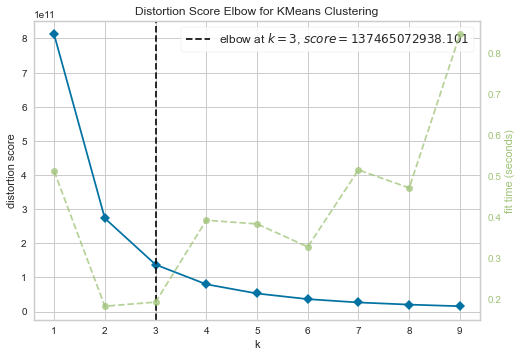

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(customer_data)    # Fit the data to the visualizer
visualizer.poof() 